In [1]:
# import libraries
import os
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interpn
from scipy.interpolate import interp1d
import pickle 
import xarray as xr
import matplotlib.colors as colors
import seaborn as sns
import cmocean

# import some home-made functions
import nbimporter

# for mapping
import cartopy.crs as ccrs
# https://cosima-recipes.readthedocs.io/en/latest/tutorials/Making_Maps_with_Cartopy.html
import cartopy.feature as cft
# BIG issue with cartopy: see here https://github.com/SciTools/cartopy/issues/1325 at @jypeter
# I had to download a bunch of stuff myself and put it in ~/.local/share/cartopy/shapefile/.../...
# https://stackoverflow.com/questions/30030328/correct-placement-of-colorbar-relative-to-geo-axes-cartopy
# https://scitools.org.uk/cartopy/docs/v0.15/examples/axes_grid_basic.html
land_110m = cft.NaturalEarthFeature('physical', 'land', '110m', edgecolor='black', facecolor='gray', linewidth=0.5) # continents

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [2]:
data = open("../data/output_data_for_figures/data_figED2.pkl", "rb")
data = pickle.load(data)

In [3]:
FexpT = data['FexpT']
lonT = data['lon']
latT = data['lat']
mask = data['mask']
FexpH = data['FexpH']
pixelArea = data['pixelArea']

In [4]:
def compute_flux_total(FseqX, pixel_areas):
    """
    Input : a 2D array with fluxes (can be exported, sequestered, remineralized carbon flux) 
    Output: total amount of exported, sequestered, remineralized carbon flux in GtC/year
    """
    res = np.nansum(np.nansum(FseqX * pixel_areas[:,:]*1e-15, axis = 1)) # in GtC year-1 
    return(res)

<ipython-input-6-d666702c623f>:8: RuntimeWarning: Mean of empty slice
  FexpT_averaged = np.nanmean(FexpT, axis = 0)


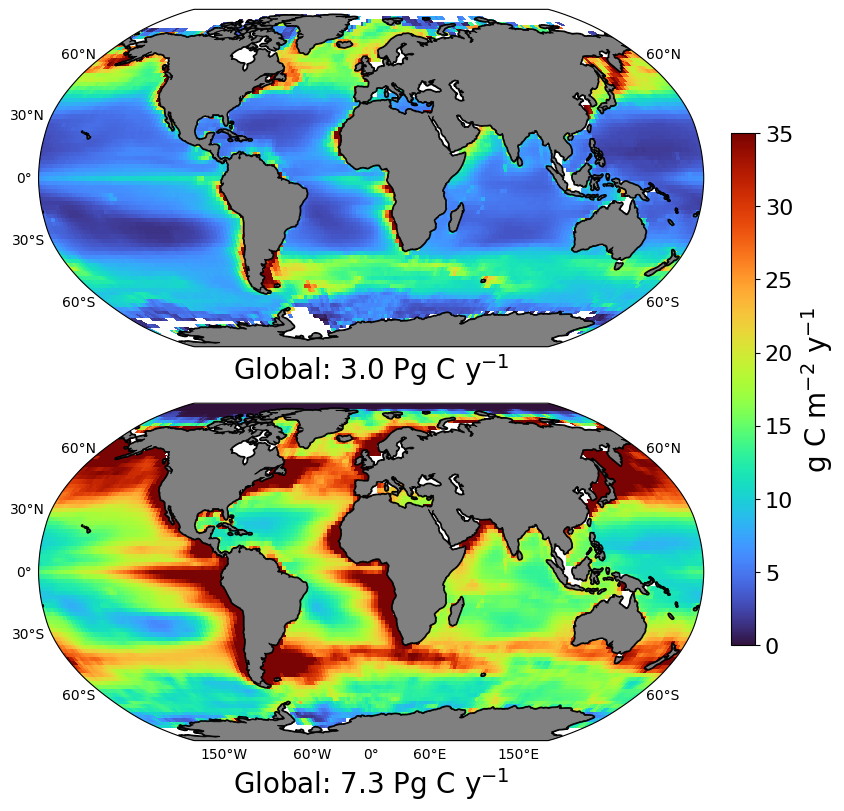

In [6]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html
pal = 'turbo'

from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout=True, figsize = (12,8))
gs = GridSpec(2, 1, figure=fig)

FexpT_averaged = np.nanmean(FexpT, axis = 0)

ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.Robinson())
ax1.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
p1 = plt.pcolormesh(lonT, latT, FexpH*mask, vmin = 0, vmax = 35, shading = 'auto', transform=ccrs.PlateCarree(), cmap = pal)
ax1.add_feature(land_110m)
#ax1.set_title('POC export at 100 m (gC m$^{-2}$ y$^{-1}$)', fontsize = 20, y = -0.12)
ax1.set_title('Global: '+str(np.round(compute_flux_total(FexpH*mask, pixelArea), 1))+' Pg C y$^{-1}$', fontsize = 20, y = -0.12)
gl = ax1.gridlines(draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False
gl.top_labels = False
gl.left_labels = True
gl.xlocator = mticker.FixedLocator([-150, -60, 0, 60, 150])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlines = False
gl.ylines = False

ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.Robinson())
ax2.coastlines(resolution='110m', color='black', linestyle='-', alpha=1, linewidth = 2)
p2 = plt.pcolormesh(lonT, latT, FexpT_averaged*mask, vmin = 0, vmax = 35, shading = 'auto', transform=ccrs.PlateCarree(), cmap = pal)
ax2.add_feature(land_110m)
ax2.set_title('Global: '+str(np.round(compute_flux_total(FexpT_averaged*mask, pixelArea), 1))+' Pg C y$^{-1}$', fontsize = 20, y = -0.18)
gl = ax2.gridlines(draw_labels=True)
gl.bottom_labels = True
gl.right_labels = False
gl.top_labels = False
gl.left_labels = True
gl.xlocator = mticker.FixedLocator([-150, -60, 0, 60, 150])
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlines = False
gl.ylines = False

# https://stackoverflow.com/questions/65942632/matplotlib-why-does-colorbar-y-label-disappear-with-multiple-colorbars
cbar_ax = fig.add_axes([.80, 0.20, 0.02, 0.64])
cbar_ax.tick_params(labelsize=16)
col = fig.colorbar(p1, cax=cbar_ax)
cbar_ax.set_ylabel('g C m$^{-2}$ y$^{-1}$', fontsize = 20)
cbar_ax.yaxis.set_label_position('right')
# col = fig.colorbar(p1, cax=cbar_ax)
plt.savefig('FigED2.jpg', bbox_inches = "tight", dpi=300)
plt.show()